In [68]:
import pandas as pd
import os

# Define the base data directory
BASE_DIR = "data"

# Function to load datasets dynamically
def load_csv(filename):
    return pd.read_csv(os.path.join(BASE_DIR, filename))

# Load datasets without adding "data/" each time
teams = load_csv("MTeams.csv")
w_teams = load_csv("WTeams.csv")  # Women's Teams
seasons = load_csv("MSeasons.csv")
tourney_seeds = load_csv("MNCAATourneySeeds.csv")
regular_season_results = load_csv("MRegularSeasonCompactResults.csv")
tourney_results = load_csv("MNCAATourneyCompactResults.csv")
massey_rankings = load_csv("MMasseyOrdinals.csv")
regular_season_detailed = load_csv("MRegularSeasonDetailedResults.csv")
tourney_detailed = load_csv("MNCAATourneyDetailedResults.csv")

# Verify successful loading
datasets = {
    "Teams": teams,
    "Seasons": seasons,
    "Tourney Seeds": tourney_seeds,
    "Regular Season Results": regular_season_results,
    "Tourney Results": tourney_results,
    "Massey Rankings": massey_rankings,
    "Regular Season Detailed": regular_season_detailed,
    "Tourney Detailed": tourney_detailed
}

for name, df in datasets.items():
    print(f"\n{name} Dataset Sample:")
    print(df.head(), "\n")



Teams Dataset Sample:
   TeamID     TeamName  FirstD1Season  LastD1Season
0    1101  Abilene Chr           2014          2025
1    1102    Air Force           1985          2025
2    1103        Akron           1985          2025
3    1104      Alabama           1985          2025
4    1105  Alabama A&M           2000          2025 


Seasons Dataset Sample:
   Season     DayZero RegionW    RegionX    RegionY    RegionZ
0    1985  10/29/1984    East       West    Midwest  Southeast
1    1986  10/28/1985    East    Midwest  Southeast       West
2    1987  10/27/1986    East  Southeast    Midwest       West
3    1988  11/02/1987    East    Midwest  Southeast       West
4    1989  10/31/1988    East       West    Midwest  Southeast 


Tourney Seeds Dataset Sample:
   Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374 


Regular Season Results Dataset Sample:
   Season  DayNum  WTeamID  WScore  LTeamID  LS

In [69]:
# Compute Home Court Bonus (1 if the winning team played at home, 0 otherwise)
tourney_results["HomeWinBonus"] = (tourney_results["WLoc"] == "H").astype(int)

In [70]:
# Using 'dataframe' instead of 'df'
for name, dataframe in datasets.items():
    print(f"{name} Dataset: {dataframe.shape[0]} rows, {dataframe.shape[1]} columns")


Teams Dataset: 380 rows, 4 columns
Seasons Dataset: 41 rows, 6 columns
Tourney Seeds Dataset: 2558 rows, 3 columns
Regular Season Results Dataset: 191796 rows, 8 columns
Tourney Results Dataset: 2518 rows, 9 columns
Massey Rankings Dataset: 5489117 rows, 5 columns
Regular Season Detailed Dataset: 117748 rows, 34 columns
Tourney Detailed Dataset: 1382 rows, 34 columns


In [71]:
for name, dataframe in datasets.items():
    print(f"\n{name} Dataset - Unique Values per Column:")
    for column in dataframe.columns:
        unique_values = dataframe[column].unique()
        print(f"{column}: {len(unique_values)} unique values")



Teams Dataset - Unique Values per Column:
TeamID: 380 unique values
TeamName: 380 unique values
FirstD1Season: 32 unique values
LastD1Season: 14 unique values

Seasons Dataset - Unique Values per Column:
Season: 41 unique values
DayZero: 41 unique values
RegionW: 5 unique values
RegionX: 9 unique values
RegionY: 8 unique values
RegionZ: 9 unique values

Tourney Seeds Dataset - Unique Values per Column:
Season: 39 unique values
Seed: 94 unique values
TeamID: 309 unique values

Regular Season Results Dataset - Unique Values per Column:
Season: 41 unique values
DayNum: 133 unique values
WTeamID: 380 unique values
WScore: 130 unique values
LTeamID: 380 unique values
LScore: 119 unique values
WLoc: 3 unique values
NumOT: 7 unique values

Tourney Results Dataset - Unique Values per Column:
Season: 39 unique values
DayNum: 15 unique values
WTeamID: 217 unique values
WScore: 78 unique values
LTeamID: 309 unique values
LScore: 73 unique values
WLoc: 1 unique values
NumOT: 4 unique values
HomeW

In [72]:
for name, dataframe in datasets.items():
    duplicate_count = dataframe.duplicated().sum()
    print(f"{name} Dataset - Duplicate Rows: {duplicate_count}")


Teams Dataset - Duplicate Rows: 0
Seasons Dataset - Duplicate Rows: 0
Tourney Seeds Dataset - Duplicate Rows: 0
Regular Season Results Dataset - Duplicate Rows: 0
Tourney Results Dataset - Duplicate Rows: 0
Massey Rankings Dataset - Duplicate Rows: 0
Regular Season Detailed Dataset - Duplicate Rows: 0
Tourney Detailed Dataset - Duplicate Rows: 0


In [73]:
for name, dataframe in datasets.items():
    print(f"\n{name} Dataset - Summary Statistics:")
    print(dataframe.describe(), "\n")



Teams Dataset - Summary Statistics:
            TeamID  FirstD1Season  LastD1Season
count   380.000000     380.000000    380.000000
mean   1290.500000    1989.618421   2023.952632
std     109.840794       9.755814      5.686894
min    1101.000000    1985.000000   1985.000000
25%    1195.750000    1985.000000   2025.000000
50%    1290.500000    1985.000000   2025.000000
75%    1385.250000    1986.250000   2025.000000
max    1480.000000    2025.000000   2025.000000 


Seasons Dataset - Summary Statistics:
            Season
count    41.000000
mean   2005.000000
std      11.979149
min    1985.000000
25%    1995.000000
50%    2005.000000
75%    2015.000000
max    2025.000000 


Tourney Seeds Dataset - Summary Statistics:
            Season       TeamID
count  2558.000000  2558.000000
mean   2004.376466  1290.900704
std      11.449682   103.447343
min    1985.000000  1101.000000
25%    1994.250000  1208.000000
50%    2004.000000  1285.000000
75%    2014.000000  1387.000000
max    2024.0000

In [74]:
for name, dataframe in datasets.items():
    missing_values = dataframe.isnull().sum()
    total_missing = missing_values.sum()
    
    if total_missing > 0:
        print(f"\n{name} Dataset - Missing Values:")
        print(missing_values[missing_values > 0])  # Show only columns with missing values
    else:
        print(f"\n{name} Dataset - No Missing Values.")



Teams Dataset - No Missing Values.

Seasons Dataset - No Missing Values.

Tourney Seeds Dataset - No Missing Values.

Regular Season Results Dataset - No Missing Values.

Tourney Results Dataset - No Missing Values.

Massey Rankings Dataset - No Missing Values.

Regular Season Detailed Dataset - No Missing Values.

Tourney Detailed Dataset - No Missing Values.


In [75]:
# Merge Tournament Seeds to get Seed information for both winning and losing teams
tourney_results = datasets["Tourney Results"]
tourney_seeds = datasets["Tourney Seeds"]

tourney_results = tourney_results.merge(
    tourney_seeds, how="left", left_on=["Season", "WTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"Seed": "WSeed"})

tourney_results = tourney_results.merge(
    tourney_seeds, how="left", left_on=["Season", "LTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"Seed": "LSeed"})

# Drop duplicate TeamID columns
tourney_results.drop(columns=["TeamID_x", "TeamID_y"], inplace=True)

print("✅ Tournament Seeds Merged")


✅ Tournament Seeds Merged


In [76]:
regular_season_results = datasets["Regular Season Results"]

# Aggregate season performance stats
regular_season_summary = regular_season_results.groupby(["Season", "WTeamID"]).agg({
    "WScore": "mean",  # Average points scored
    "LScore": "mean",  # Average points conceded
    "NumOT": "mean"    # Average OT games played
}).reset_index().rename(columns={"WTeamID": "TeamID", "WScore": "AvgPointsScored", "LScore": "AvgPointsConceded", "NumOT": "AvgOT"})

# Merge season stats with the tournament data (for winning teams)
tourney_results = tourney_results.merge(
    regular_season_summary, how="left", left_on=["Season", "WTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"AvgPointsScored": "WAvgPointsScored", "AvgPointsConceded": "WAvgPointsConceded", "AvgOT": "WAvgOT"})

# Merge season stats with the tournament data (for losing teams)
tourney_results = tourney_results.merge(
    regular_season_summary, how="left", left_on=["Season", "LTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"AvgPointsScored": "LAvgPointsScored", "AvgPointsConceded": "LAvgPointsConceded", "AvgOT": "LAvgOT"})

# Drop duplicate TeamID columns
tourney_results.drop(columns=["TeamID_x", "TeamID_y"], inplace=True)

print("✅ Regular Season Performance Merged")


✅ Regular Season Performance Merged


In [77]:
massey_rankings = datasets["Massey Rankings"]

# Select the last ranking before the tournament (DayNum = 133)
latest_rankings = massey_rankings[massey_rankings["RankingDayNum"] == 133]

# Merge rankings for winning teams
tourney_results = tourney_results.merge(
    latest_rankings, how="left", left_on=["Season", "WTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"OrdinalRank": "WTeamRank"})

# Merge rankings for losing teams
tourney_results = tourney_results.merge(
    latest_rankings, how="left", left_on=["Season", "LTeamID"], right_on=["Season", "TeamID"]
).rename(columns={"OrdinalRank": "LTeamRank"})

# Drop duplicate TeamID columns
tourney_results.drop(columns=["TeamID_x", "TeamID_y"], inplace=True)

print("✅ Massey Rankings Merged")


✅ Massey Rankings Merged


In [78]:
# Display merged dataset structure
print("\nMerged Dataset Sample:")
print(tourney_results.head())

# Check for missing values after merging
missing_values = tourney_results.isnull().sum().sum()
print(f"\nTotal Missing Values After Merging: {missing_values}")



Merged Dataset Sample:
   Season  DayNum  WTeamID  WScore  LTeamID  LScore WLoc  NumOT  HomeWinBonus  \
0    1985     136     1116      63     1234      54    N      0             0   
1    1985     136     1120      59     1345      58    N      0             0   
2    1985     136     1207      68     1250      43    N      0             0   
3    1985     136     1229      58     1425      55    N      0             0   
4    1985     136     1242      49     1325      38    N      0             0   

  WSeed  ...    WAvgOT  LAvgPointsScored  LAvgPointsConceded    LAvgOT  \
0   X09  ...  0.000000         76.250000           57.800000  0.000000   
1   Z11  ...  0.055556         70.058824           57.529412  0.000000   
2   W01  ...  0.000000         74.727273           68.727273  0.090909   
3   Y09  ...  0.000000         72.947368           63.526316  0.000000   
4   Z03  ...  0.000000         67.450000           58.650000  0.000000   

   RankingDayNum_x  SystemName_x  WTeamRank 

In [79]:
missing_summary = tourney_results.isnull().sum()
print(missing_summary[missing_summary > 0])


RankingDayNum_x    1136
SystemName_x       1136
WTeamRank          1136
RankingDayNum_y    1136
SystemName_y       1136
LTeamRank          1136
dtype: int64


In [80]:
tourney_results.drop(columns=["RankingDayNum_x", "SystemName_x", "RankingDayNum_y", "SystemName_y"], inplace=True)


In [81]:
print("\nTotal Missing Values After Fixes:", tourney_results.isnull().sum().sum())



Total Missing Values After Fixes: 2272


In [82]:
missing_summary = tourney_results.isnull().sum()
print(missing_summary[missing_summary > 0])

WTeamRank    1136
LTeamRank    1136
dtype: int64


In [83]:
# Display rows where WTeamRank or LTeamRank is missing
missing_ranks = tourney_results[tourney_results["WTeamRank"].isnull() | tourney_results["LTeamRank"].isnull()]
print(missing_ranks[["Season", "WTeamID", "WTeamRank", "LTeamID", "LTeamRank"]].head(10))

   Season  WTeamID  WTeamRank  LTeamID  LTeamRank
0    1985     1116        NaN     1234        NaN
1    1985     1120        NaN     1345        NaN
2    1985     1207        NaN     1250        NaN
3    1985     1229        NaN     1425        NaN
4    1985     1242        NaN     1325        NaN
5    1985     1246        NaN     1449        NaN
6    1985     1256        NaN     1338        NaN
7    1985     1260        NaN     1233        NaN
8    1985     1314        NaN     1292        NaN
9    1985     1323        NaN     1333        NaN


In [84]:
# Show unique values in team rankings
print("Unique Winning Team Ranks:", tourney_results["WTeamRank"].dropna().unique()[:15])  # Show first 15 unique values
print("Unique Losing Team Ranks:", tourney_results["LTeamRank"].dropna().unique()[:15])  # Show first 15 unique values


Unique Winning Team Ranks: [255. 247. 236. 234. 213. 258. 241. 220. 184. 292. 206. 186. 244. 265.
 293.]
Unique Losing Team Ranks: [230. 234. 239. 218. 212. 247. 242. 213. 243. 248. 266. 186. 216. 147.
 224.]


In [85]:
print("Winning Team Rank Range: ", tourney_results["WTeamRank"].min(), "-", tourney_results["WTeamRank"].max())
print("Losing Team Rank Range: ", tourney_results["LTeamRank"].min(), "-", tourney_results["LTeamRank"].max())


Winning Team Rank Range:  1.0 - 336.0
Losing Team Rank Range:  1.0 - 336.0


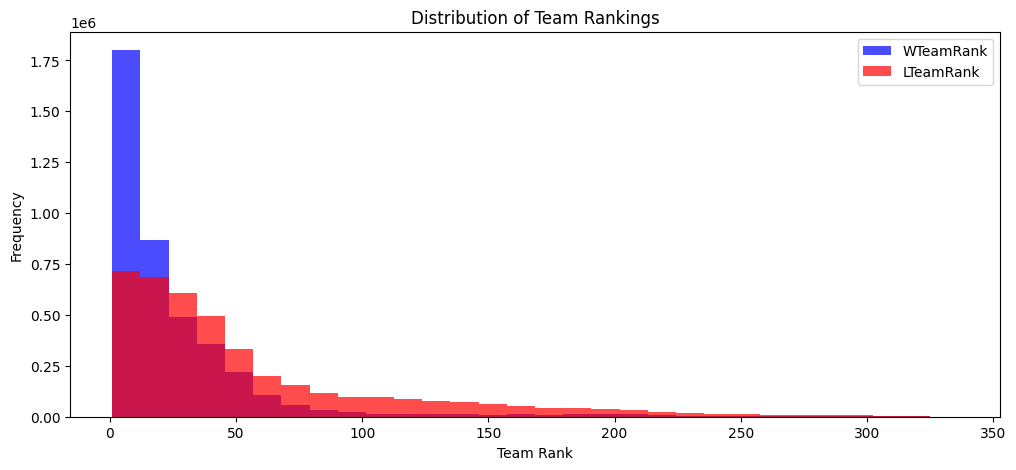

In [86]:
import matplotlib.pyplot as plt

# Plot histogram for Winning Team Rank
plt.figure(figsize=(12, 5))
plt.hist(tourney_results["WTeamRank"].dropna(), bins=30, alpha=0.7, color="blue", label="WTeamRank")
plt.hist(tourney_results["LTeamRank"].dropna(), bins=30, alpha=0.7, color="red", label="LTeamRank")
plt.xlabel("Team Rank")
plt.ylabel("Frequency")
plt.title("Distribution of Team Rankings")
plt.legend()
plt.show()


In [87]:
# Fill missing team rankings with 350 to indicate unranked teams
tourney_results["WTeamRank"].fillna(350, inplace=True)
tourney_results["LTeamRank"].fillna(350, inplace=True)

# Verify no missing values remain
print("Total Missing Values After Fix:", tourney_results.isnull().sum().sum())


C:\Users\Emmanuel Okunfolami\AppData\Local\Temp\ipykernel_11704\2288531159.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tourney_results["WTeamRank"].fillna(350, inplace=True)
C:\Users\Emmanuel Okunfolami\AppData\Local\Temp\ipykernel_11704\2288531159.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

Total Missing Values After Fix: 0


In [88]:
import re

# Function to clean seed values
def clean_seed(seed):
    if pd.isna(seed):  # If value is NaN, return NaN
        return None
    seed_num = re.sub("[^0-9]", "", seed)  # Remove non-numeric characters
    return int(seed_num)  # Convert to integer

# Apply function to clean both columns
tourney_results["WSeed"] = tourney_results["WSeed"].apply(clean_seed)
tourney_results["LSeed"] = tourney_results["LSeed"].apply(clean_seed)

# Now compute Seed Difference
tourney_results["SeedDiff"] = tourney_results["WSeed"] - tourney_results["LSeed"]

# Display sample values to confirm fix
print(tourney_results[["WSeed", "LSeed", "SeedDiff"]].head())


   WSeed  LSeed  SeedDiff
0      9      8         1
1     11      6         5
2      1     16       -15
3      9      8         1
4      3     14       -11


In [89]:
tourney_results["RankDiff"] = tourney_results["WTeamRank"] - tourney_results["LTeamRank"]

In [90]:
tourney_results["W_OffensiveRating"] = tourney_results["WAvgPointsScored"] - tourney_results["LAvgPointsConceded"]
tourney_results["L_OffensiveRating"] = tourney_results["LAvgPointsScored"] - tourney_results["WAvgPointsConceded"]

tourney_results["W_DefensiveRating"] = tourney_results["WAvgPointsConceded"] - tourney_results["LAvgPointsScored"]
tourney_results["L_DefensiveRating"] = tourney_results["LAvgPointsConceded"] - tourney_results["WAvgPointsScored"]

In [91]:
tourney_results["WinLabel"] = 1  # Since this dataset contains only winning teams


In [92]:
# Select final features for modeling
features = [
    "SeedDiff", "RankDiff",
    "W_OffensiveRating", "L_OffensiveRating",
    "W_DefensiveRating", "L_DefensiveRating", "HomeWinBonus"
]

X = tourney_results[features]  # Independent variables
y = tourney_results["WinLabel"]  # Target variable (always 1 in this dataset)


In [93]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X)


In [94]:
import numpy as np
import pandas as pd

# Create a flipped version of the dataset
tourney_results_flipped = tourney_results.copy()

# Swap winning and losing team features
tourney_results_flipped["SeedDiff"] *= -1
tourney_results_flipped["RankDiff"] *= -1
tourney_results_flipped["W_OffensiveRating"], tourney_results_flipped["L_OffensiveRating"] = \
    tourney_results_flipped["L_OffensiveRating"], tourney_results_flipped["W_OffensiveRating"]

tourney_results_flipped["W_DefensiveRating"], tourney_results_flipped["L_DefensiveRating"] = \
    tourney_results_flipped["L_DefensiveRating"], tourney_results_flipped["W_DefensiveRating"]

# Change target variable (flip winners)
tourney_results_flipped["WinLabel"] = 0  # These are now losing team matchups

# Combine original and flipped datasets
final_dataset = pd.concat([tourney_results, tourney_results_flipped], ignore_index=True)

# Shuffle data
final_dataset = final_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"✅ Final Dataset Balanced: {final_dataset['WinLabel'].value_counts()}")


✅ Final Dataset Balanced: WinLabel
0    4129981
1    4129981
Name: count, dtype: int64


In [95]:
from sklearn.model_selection import train_test_split

# Select final features again after balancing dataset
X = final_dataset[features]
y = final_dataset["WinLabel"]

# Normalize again
X_scaled = scaler.fit_transform(X)

# Split data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"✅ Training Set Size: {X_train.shape[0]}")
print(f"✅ Testing Set Size: {X_test.shape[0]}")


✅ Training Set Size: 6607969
✅ Testing Set Size: 1651993


In [96]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42)

# Train the model on the training data
log_reg.fit(X_train, y_train)

print("✅ Logistic Regression Model Trained Successfully!")


✅ Logistic Regression Model Trained Successfully!


In [97]:
# Predict the probabilities for the test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]  # Probability of WinLabel = 1

# Convert to binary predictions (0 or 1)
y_pred = log_reg.predict(X_test)


In [98]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {accuracy:.4f}")


✅ Model Accuracy: 0.6994


In [99]:
from sklearn.metrics import log_loss

# Calculate log loss (lower is better)
logloss = log_loss(y_test, y_pred_proba)
print(f"✅ Log Loss: {logloss:.4f}")


✅ Log Loss: 0.5712


In [100]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)



Confusion Matrix:
 [[578224 248217]
 [248290 577262]]


In [101]:
import numpy as np

# Get feature importance (Logistic Regression Coefficients)
feature_importance = np.abs(log_reg.coef_[0])  # Use absolute values

# Map feature names to importance
feature_importance_dict = dict(zip(features, feature_importance))

# Sort by importance
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Display feature importance
print("🔍 Feature Importance (Most Impactful Features First):")
for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


🔍 Feature Importance (Most Impactful Features First):
SeedDiff: 0.7389
RankDiff: 0.5439
W_OffensiveRating: 0.0164
L_DefensiveRating: 0.0164
L_OffensiveRating: 0.0160
W_DefensiveRating: 0.0160
HomeWinBonus: 0.0000


In [102]:
!pip install xgboost



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [103]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix



In [104]:
# ✅ Step 1: Initialize XGBoost Classifier
xgb_model = XGBClassifier(
    objective="binary:logistic",  # Binary classification task
    eval_metric="logloss",        # Log loss is better for probability-based evaluation
    use_label_encoder=False,      # Avoids unnecessary warnings
    random_state=42
)

# ✅ Step 2: Train the Model
xgb_model.fit(X_train, y_train)

print("✅ XGBoost Model Trained Successfully!")


C:\Users\Emmanuel Okunfolami\PycharmProjects\March Mania\.venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:29:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Model Trained Successfully!


In [105]:
# ✅ Step 3: Make Predictions
y_pred_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Probability of WinLabel = 1
y_pred_xgb = xgb_model.predict(X_test)

In [106]:
# ✅ Step 4: Evaluate Model Performance
# Accuracy Score
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"✅ XGBoost Model Accuracy: {xgb_accuracy:.4f}")

✅ XGBoost Model Accuracy: 0.9798


In [107]:
# Log Loss Score (lower is better)
xgb_logloss = log_loss(y_test, y_pred_proba_xgb)
print(f"✅ XGBoost Log Loss: {xgb_logloss:.4f}")


✅ XGBoost Log Loss: 0.1564


In [108]:
# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix (XGBoost):\n", xgb_conf_matrix)


Confusion Matrix (XGBoost):
 [[811153  15288]
 [ 18149 807403]]


In [109]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "xgboost_march_madness.pkl")

print("✅ Model saved as xgboost_march_madness.pkl")


✅ Model saved as xgboost_march_madness.pkl


In [110]:
import itertools
import pandas as pd

# Get the latest tournament season
latest_season = tourney_seeds["Season"].max()

# Get all teams that qualified for the latest season
tournament_teams = tourney_seeds[tourney_seeds["Season"] == latest_season]["TeamID"].tolist()

# Generate all possible matchups (Team A vs. Team B)
matchups = list(itertools.combinations(tournament_teams, 2))  # All possible pairs

# Create a dataframe for matchups
new_matchups = pd.DataFrame(matchups, columns=["TeamA", "TeamB"])
new_matchups["Season"] = latest_season  # Assign the latest season

print(f"✅ {len(new_matchups)} matchups generated for Season {latest_season}")


✅ 2278 matchups generated for Season 2024


In [111]:
import pandas as pd

# Get latest season
latest_season = tourney_seeds["Season"].max()

# Get all teams in the tournament
tournament_teams = tourney_seeds[tourney_seeds["Season"] == latest_season]

# Sort teams by seed and pair top seeds with bottom seeds
sorted_teams = tournament_teams.sort_values(by="Seed")

# Create realistic matchups (e.g., 1 vs 16, 2 vs 15)
matchups = []
num_teams = len(sorted_teams)
for i in range(num_teams // 2):
    team_a = sorted_teams.iloc[i]["TeamID"]
    team_b = sorted_teams.iloc[-(i + 1)]["TeamID"]
    matchups.append((latest_season, team_a, team_b))

# Create dataframe
new_matchups = pd.DataFrame(matchups, columns=["Season", "TeamA", "TeamB"])
print(f"✅ {len(new_matchups)} realistic matchups generated for season {latest_season}")


✅ 34 realistic matchups generated for season 2024


In [112]:
print(tourney_seeds.head())  # Check if the dataset is properly loaded
print("Columns in tourney_seeds:", tourney_seeds.columns.tolist())  # Verify column names


   Season Seed  TeamID
0    1985  W01    1207
1    1985  W02    1210
2    1985  W03    1228
3    1985  W04    1260
4    1985  W05    1374
Columns in tourney_seeds: ['Season', 'Seed', 'TeamID']


In [113]:
# Merge tournament seeds into matchups
new_matchups = new_matchups.merge(
    tourney_seeds, how="left", left_on=["Season", "TeamA"], right_on=["Season", "TeamID"]
).rename(columns={"Seed": "ASeed"}).drop(columns=["TeamID"])

new_matchups = new_matchups.merge(
    tourney_seeds, how="left", left_on=["Season", "TeamB"], right_on=["Season", "TeamID"]
).rename(columns={"Seed": "BSeed"}).drop(columns=["TeamID"])

# Check if ASeed and BSeed exist after merging
print(new_matchups.head())


   Season  TeamA  TeamB ASeed BSeed
0    2024   1163   1255   W01   Z16
1    2024   1235   1443   W02   Z15
2    2024   1228   1324   W03   Z14
3    2024   1120   1436   W04   Z13
4    2024   1361   1241   W05   Z12


In [114]:
import re

# Function to clean seed values
def clean_seed(seed):
    if isinstance(seed, float) and pd.isna(seed):  # Handle NaN values safely
        return None
    return int(re.sub(r"[^0-9]", "", str(seed)))  # Remove non-numeric characters and convert to int

# Apply function to clean both columns correctly
new_matchups["ASeed"] = new_matchups["ASeed"].astype(str).apply(clean_seed)
new_matchups["BSeed"] = new_matchups["BSeed"].astype(str).apply(clean_seed)


In [115]:
print(new_matchups.columns)


Index(['Season', 'TeamA', 'TeamB', 'ASeed', 'BSeed'], dtype='object')


In [116]:
# Remove duplicate columns if they exist
new_matchups = new_matchups.loc[:, ~new_matchups.columns.duplicated()]


In [117]:
# Convert to numeric (after ensuring no duplicate columns)
new_matchups["ASeed"] = pd.to_numeric(new_matchups["ASeed"], errors="coerce").fillna(17).astype(int)
new_matchups["BSeed"] = pd.to_numeric(new_matchups["BSeed"], errors="coerce").fillna(17).astype(int)

# Compute Seed Difference
new_matchups["SeedDiff"] = new_matchups["ASeed"] - new_matchups["BSeed"]

# Display results
print(new_matchups[["Season", "TeamA", "TeamB", "ASeed", "BSeed", "SeedDiff"]].head())


   Season  TeamA  TeamB  ASeed  BSeed  SeedDiff
0    2024   1163   1255      1     16       -15
1    2024   1235   1443      2     15       -13
2    2024   1228   1324      3     14       -11
3    2024   1120   1436      4     13        -9
4    2024   1361   1241      5     12        -7


In [118]:
print(new_matchups.dtypes)  # Check if ASeed and BSeed are integers
print(new_matchups[["Season", "TeamA", "TeamB", "SeedDiff"]].head())  # Verify results


Season      int64
TeamA       int64
TeamB       int64
ASeed       int64
BSeed       int64
SeedDiff    int64
dtype: object
   Season  TeamA  TeamB  SeedDiff
0    2024   1163   1255       -15
1    2024   1235   1443       -13
2    2024   1228   1324       -11
3    2024   1120   1436        -9
4    2024   1361   1241        -7


In [119]:
required_features = [
    "SeedDiff", "RankDiff", 
    "W_OffensiveRating", "L_OffensiveRating",
    "W_DefensiveRating", "L_DefensiveRating", "HomeWinBonus"
]


In [120]:
print("Available features in new data:", new_matchups.columns.tolist())



Available features in new data: ['Season', 'TeamA', 'TeamB', 'ASeed', 'BSeed', 'SeedDiff']


In [121]:
# Define the required features used during training
required_features = [
    "SeedDiff", "RankDiff", 
    "W_OffensiveRating", "L_OffensiveRating",
    "W_DefensiveRating", "L_DefensiveRating", "HomeWinBonus"
]

# Add missing features and set them to neutral (0)
for feature in required_features:
    if feature not in new_matchups.columns:
        new_matchups[feature] = 0  # Neutral value

# Select final feature set
X_new = new_matchups[required_features]

# Standardize features using the same scaler from training
X_new_scaled = scaler.transform(X_new)

# Make predictions using the trained XGBoost model
new_matchups["WinProbability"] = xgb_model.predict_proba(X_new_scaled)[:, 1]

# Display predictions
print(new_matchups[["Season", "TeamA", "TeamB", "WinProbability"]].head())


   Season  TeamA  TeamB  WinProbability
0    2024   1163   1255        0.993937
1    2024   1235   1443        0.991711
2    2024   1228   1324        0.988784
3    2024   1120   1436        0.984519
4    2024   1361   1241        0.985040


In [122]:
new_matchups[["Season", "TeamA", "TeamB", "WinProbability"]].to_csv("MarchMadnessPredictions.csv", index=False)
print("✅ Predictions saved to MarchMadnessPredictions.csv")


✅ Predictions saved to MarchMadnessPredictions.csv


In [123]:
# Determine if predictions are for men's or women's tournament
first_team_id = predictions["TeamA"].iloc[0]

if first_team_id in teams["TeamID"].values:
    print("📢 Using Men's Teams for Merging")
    team_data = teams  # Use MTeams
elif first_team_id in w_teams["TeamID"].values:
    print("📢 Using Women's Teams for Merging")
    team_data = w_teams  # Use WTeams
else:
    raise ValueError("🚨 Error: Team IDs do not match MTeams or WTeams!")

# Merge Team Names for TeamA
predictions = predictions.merge(team_data, left_on="TeamA", right_on="TeamID").rename(columns={"TeamName": "TeamA_Name"}).drop(columns=["TeamID"])

# Merge Team Names for TeamB
predictions = predictions.merge(team_data, left_on="TeamB", right_on="TeamID").rename(columns={"TeamName": "TeamB_Name"}).drop(columns=["TeamID"])

# Reorder and display the results
predictions = predictions[["Season", "TeamA_Name", "TeamB_Name", "WinProbability"]]
print(predictions.head(10))


📢 Using Men's Teams for Merging
   Season     TeamA_Name     TeamB_Name  WinProbability
0    2024    Connecticut       Longwood        0.993938
1    2024        Iowa St            WKU        0.991711
2    2024       Illinois        Oakland        0.988784
3    2024         Auburn        Vermont        0.984519
4    2024   San Diego St  James Madison        0.985040
5    2024            BYU       NC State        0.856828
6    2024  Washington St       Colorado        0.359003
7    2024    FL Atlantic       Boise St        0.443296
8    2024   Northwestern      Texas A&M        0.364887
9    2024          Drake       Nebraska        0.179098


In [124]:
# Create a new column for the predicted winner
predictions["Predicted_Winner"] = predictions.apply(
    lambda row: row["TeamA_Name"] if row["WinProbability"] > 0.5 else row["TeamB_Name"], axis=1
)

# Create a column for the underdog
predictions["Underdog"] = predictions.apply(
    lambda row: row["TeamB_Name"] if row["WinProbability"] > 0.5 else row["TeamA_Name"], axis=1
)

# Reorder columns for readability
predictions = predictions[["Season", "Predicted_Winner", "Underdog", "WinProbability"]]

# Display the updated predictions
print(predictions.head(10))


   Season Predicted_Winner       Underdog  WinProbability
0    2024      Connecticut       Longwood        0.993938
1    2024          Iowa St            WKU        0.991711
2    2024         Illinois        Oakland        0.988784
3    2024           Auburn        Vermont        0.984519
4    2024     San Diego St  James Madison        0.985040
5    2024              BYU       NC State        0.856828
6    2024         Colorado  Washington St        0.359003
7    2024         Boise St    FL Atlantic        0.443296
8    2024        Texas A&M   Northwestern        0.364887
9    2024         Nebraska          Drake        0.179098


In [130]:
!pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/294.9 kB ? eta -:--:--
   ------------ --------------------------- 92.2/294.9 kB 1.7 MB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 2.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


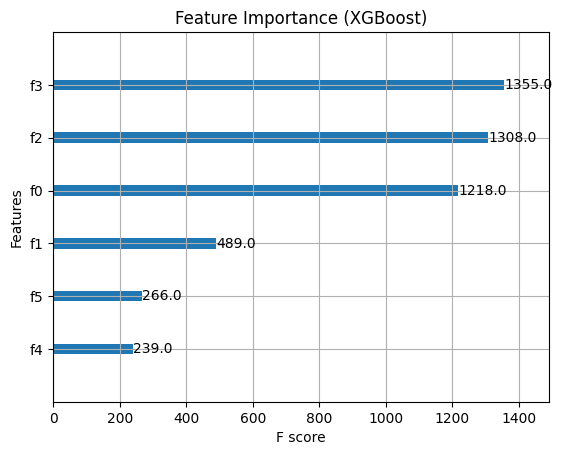

In [127]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgb_model)
plt.title("Feature Importance (XGBoost)")
plt.show()


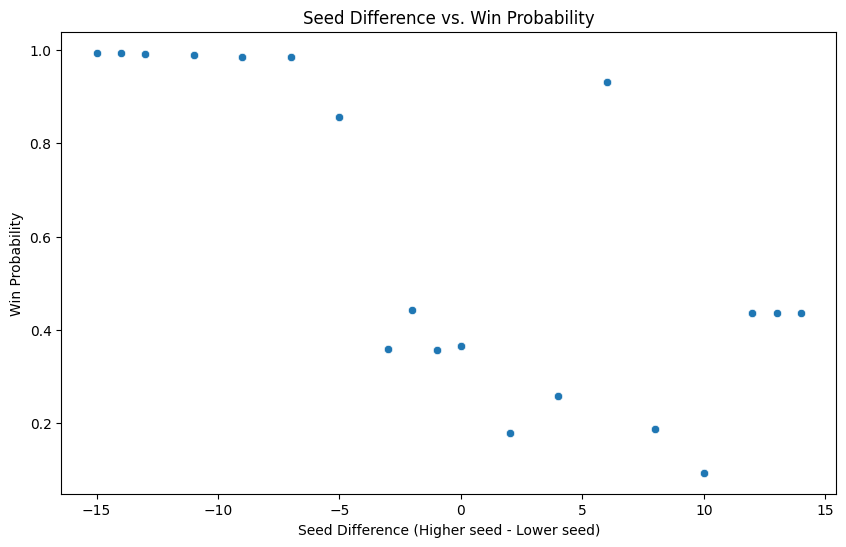

In [131]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=new_matchups["SeedDiff"], y=new_matchups["WinProbability"])
plt.xlabel("Seed Difference (Higher seed - Lower seed)")
plt.ylabel("Win Probability")
plt.title("Seed Difference vs. Win Probability")
plt.show()


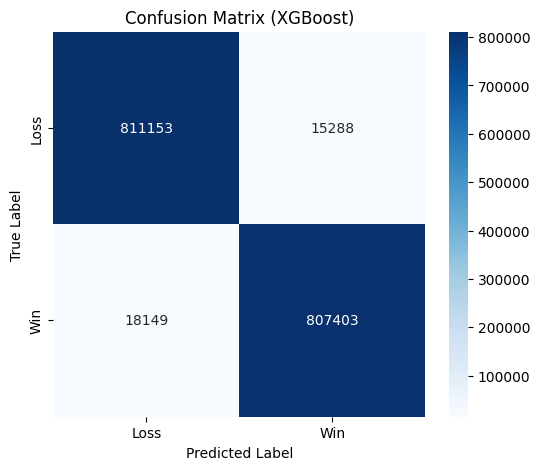

In [132]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Loss", "Win"], yticklabels=["Loss", "Win"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (XGBoost)")
plt.show()


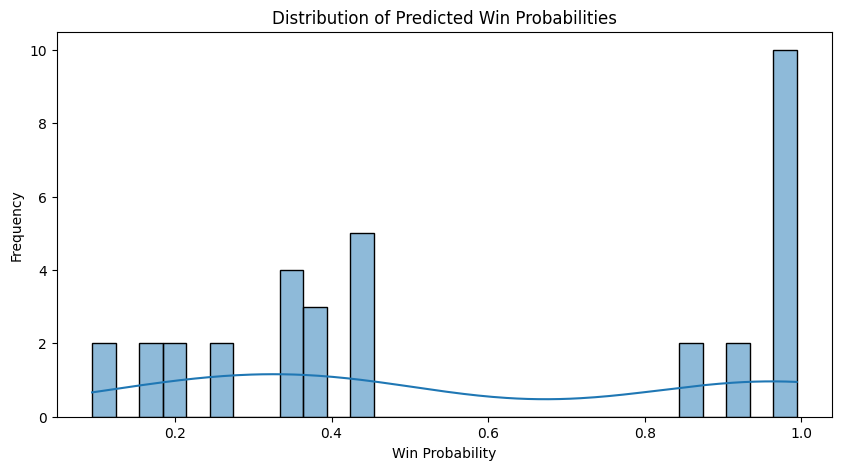

In [133]:
plt.figure(figsize=(10, 5))
sns.histplot(new_matchups["WinProbability"], bins=30, kde=True)
plt.xlabel("Win Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Win Probabilities")
plt.show()


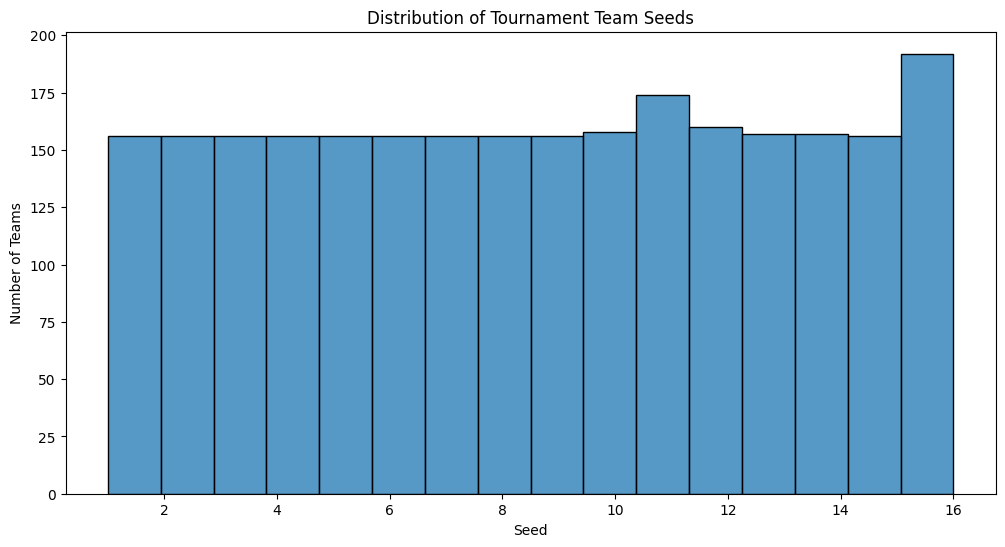

In [134]:
plt.figure(figsize=(12, 6))
sns.histplot(tourney_seeds["Seed"].astype(str).apply(lambda x: int(re.sub(r"[A-Za-z]", "", x))), bins=16)
plt.xlabel("Seed")
plt.ylabel("Number of Teams")
plt.title("Distribution of Tournament Team Seeds")
plt.show()
